In [2]:
import numpy as np
import pandas as pd

import itertools
from scipy.spatial.distance import pdist

In [3]:
data1 = np.array([
    [1, 1],
    [1.5, 2],
    [3, 3],
    [5, 7],
    [3.5, 5]
])

 # implementation of k-means algorithm

In [89]:
def kMeans(data, k=2, maxIteration=100, epsilon=0.0001, randomCentroid=False):
    
    #select centroids
    if randomCentroid:
        minC = np.min(data)
        maxC = np.max(data)
        centroids = np.zeros( (k, data.shape[1]) )
        for i in range(len(centroids)):
            centroids[i] = np.random.uniform(low=minC, high=maxC, size=(data.shape[1],))
    else:
        Npoints = k
        c = [list(x) for x in itertools.combinations(range(len(data)), Npoints )]
        distances = []
        for i in c:    
            distances.append(np.mean(pdist(data[i,:]))) # pdist: a method of computing all pairwise Euclidean distances in a condensed way.

        ind = distances.index(max(distances)) # finding the index of the max mean distance
        rows = c[ind] # these are the points in question
        centroids = data[rows]
    print(centroids)
    
    for epoch in range(maxIteration):        
        #iterattion of k-means
        clusterList = np.zeros(len(data))
        for iRow, row in enumerate(data):
            minDist = np.inf
            cluster = 0
            for i,centroid in enumerate(centroids):
                dist = np.linalg.norm(row-centroid)
                if dist < minDist:
                    minDist = dist
                    cluster = i
            clusterList[iRow] = cluster
            
        #calc new centroids
        clusterList = np.array(clusterList)
        doBreak = True
        for i in range(len(centroids)):
            newValue  = np.mean(data[clusterList==i], axis=0)                   
            if (clusterList==i).any():
              #  print(f"data[clusterList==i] {data[clusterList==i]}")
              #  print(f"newValue: {newValue}")
                if (np.abs(newValue - centroids[i]) > epsilon).any():
                    doBreak = False
                centroids[i] = newValue
        if doBreak:
            print("Change smaller than epsilon: break")
            break
    print(f"Performed {epoch} iteration of kMeans")
    return clusterList, centroids
         
            
        

In [90]:
kMeans(data1)

[[1. 1.]
 [5. 7.]]
Change smaller than epsilon: break
Performed 1 iteration of kMeans


(array([0., 0., 0., 1., 1.]), array([[1.83333333, 2.        ],
        [4.25      , 6.        ]]))

# Data preparation

In [91]:
data = pd.read_csv("cereal.csv")

data = data.drop(columns=["name", "mfr"])
data.head()

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [92]:
#type : C,H
data.loc[data['type'] == 'C', 'type'] = 0
data.loc[data['type'] == 'H', 'type'] = 1

#data[data["type"] == "H"]["type"] = 1
data.head()

,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,0,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,0,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,0,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,0,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


# Performing K-means on cereals data

In [93]:
x = data.to_numpy()

In [94]:
clusterList, centroids = kMeans(x, k=3)
print()
print()
print(clusterList)
print(centroids)

[[0 50 4 0 140 14.0 8.0 0 330 25 3 1.0 0.5 93.704912]
 [0 100 3 0 320 1.0 20.0 3 45 100 3 1.0 1.0 41.50354]
 [0 50 1 0 0 0.0 13.0 0 15 0 3 0.5 1.0 60.756112]]
Change smaller than epsilon: break
Performed 4 iteration of kMeans


[0. 2. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 2. 1. 0. 2. 1. 1. 1.
 1. 1. 2. 0. 0. 1. 2. 1. 1. 1. 2. 1. 1. 1. 1. 1. 1. 1. 1. 2. 0. 0. 0. 1.
 1. 1. 1. 1. 0. 1. 2. 2. 1. 2. 0. 0. 2. 1. 1. 2. 2. 2. 2. 1. 2. 1. 0. 1.
 1. 1. 1. 1. 1.]
[[0.0 112.14285714285714 3.357142857142857 1.4285714285714286 172.5
  5.607142857142857 12.035714285714286 9.142857142857142
  217.14285714285714 30.357142857142858 2.9285714285714284
  1.1600000000000001 0.6614285714285714 46.01531921428572]
 [0.0 109.7872340425532 2.297872340425532 0.9787234042553191
  201.91489361702128 1.2234042553191489 15.819148936170214
  7.042553191489362 65.93617021276596 32.97872340425532
  2.0638297872340425 1.0257446808510637 0.865744680851064
  37.79694365957448]
 [0.1875 93.75 2.5625 0.75 24.375 1.85

In [95]:
data.corr()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
calories,1.000000,0.019066,0.498610,0.300649,-0.293413,0.250681,0.562340,-0.066609,0.265356,0.097234,0.696091,0.087200,-0.689376
protein,0.019066,1.000000,0.208431,-0.054674,0.500330,-0.130864,-0.329142,0.549407,0.007335,0.133865,0.216158,-0.244469,0.470618
fat,0.498610,0.208431,1.000000,-0.005407,0.016719,-0.318043,0.270819,0.193279,-0.031156,0.263691,0.214625,-0.175892,-0.409284
sodium,0.300649,-0.054674,-0.005407,1.000000,-0.070675,0.355983,0.101451,-0.032603,0.361477,-0.069719,0.308576,0.119665,-0.401295
fiber,-0.293413,0.500330,0.016719,-0.070675,1.000000,-0.356083,-0.141205,0.903374,-0.032243,0.297539,0.247226,-0.513061,0.584160
carbo,0.250681,-0.130864,-0.318043,0.355983,-0.356083,1.000000,-0.331665,-0.349685,0.258148,-0.101790,0.135136,0.363932,0.052055
sugars,0.562340,-0.329142,0.270819,0.101451,-0.141205,-0.331665,1.000000,0.021696,0.125137,0.100438,0.450648,-0.032358,-0.759675
potass,-0.066609,0.549407,0.193279,-0.032603,0.903374,-0.349685,0.021696,1.000000,0.020699,0.360663,0.416303,-0.495195,0.380165
vitamins,0.265356,0.007335,-0.031156,0.361477,-0.032243,0.258148,0.125137,0.020699,1.000000,0.299262,0.320324,0.128405,-0.240544
shelf,0.097234,0.133865,0.263691,-0.069719,0.297539,-0.101790,0.100438,0.360663,0.299262,1.000000,0.190762,-0.335269,0.025159


# PCA and visualization of clusters without data normalization

In [96]:
X = x
y = clusterList
train_labels = [0,1,2]

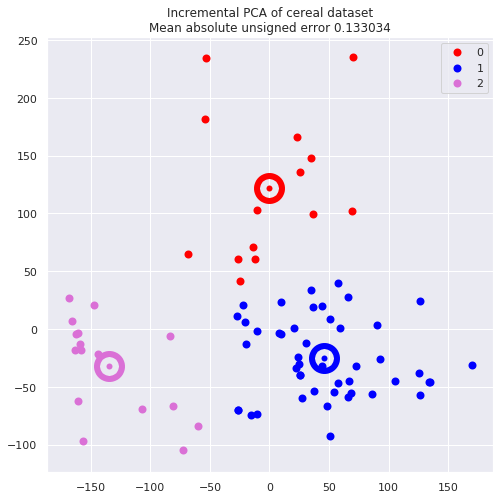

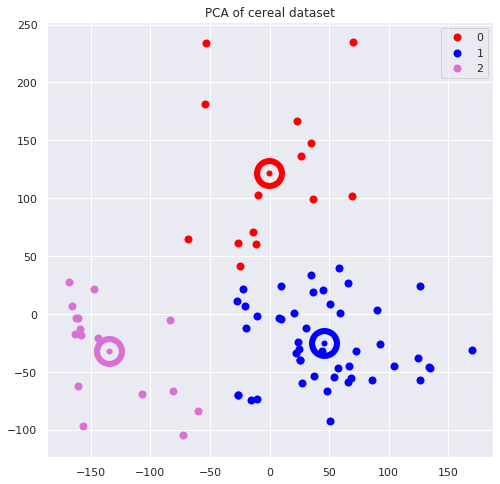

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
sns.set()

from sklearn.decomposition import PCA, IncrementalPCA


n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=4)
X_ipca = ipca.fit_transform(X)
Centr_ipca = ipca.transform(centroids)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
Centr_pca = pca.transform(centroids)


colors = mcolors.CSS4_COLORS.keys()
colors = ["red", "blue", "orchid"]

for X_transformed, centroid, title in [(X_ipca, Centr_ipca, "Incremental PCA"), (X_pca, Centr_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, range(38), train_labels):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color=color, lw=2, label=target_name)
        
        plt.scatter(centroid[i, 0], centroid[i, 1],
                    color=color, lw=25)
        

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of cereal dataset\nMean absolute unsigned error "
                  "%.6f" % err)
    else:
        plt.title(title + " of cereal dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
#    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

In [77]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.54380491 0.3849574 ]


In [78]:
# Histogram

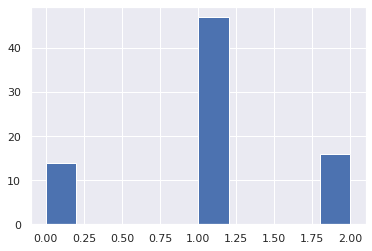

In [79]:
plt.hist(y)
plt.show()

# normalization/standarization

In [80]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [110]:
scaler = MinMaxScaler()
scaler.fit(x)
x_scalled = scaler.transform(x)

In [111]:
clusterList_scalled, centroids_scalled = kMeans(x_scalled, k=3)
print()
print()
print(clusterList_scalled)
print(centroids_scalled)

[[0.         0.         0.         0.         0.         0.
  0.58333333 0.0625     0.04833837 0.         1.         0.
  0.6        0.5645268 ]
 [1.         0.45454545 0.8        0.4        0.         0.19285714
  0.         0.         0.33534743 0.         0.         0.5
  0.336      0.43331546]
 [0.         0.81818182 0.4        0.2        0.59375    0.28571429
  0.66666667 0.9375     0.6978852  1.         1.         1.
  0.6        0.13943493]]
Change smaller than epsilon: break
Performed 8 iteration of kMeans


[2. 2. 2. 2. 2. 0. 2. 2. 0. 2. 2. 1. 2. 2. 2. 0. 0. 0. 2. 2. 1. 2. 2. 2.
 2. 0. 0. 2. 2. 2. 0. 2. 2. 2. 2. 2. 0. 0. 2. 2. 0. 2. 2. 1. 2. 2. 2. 0.
 2. 2. 2. 2. 2. 2. 0. 0. 2. 1. 2. 2. 2. 0. 0. 0. 0. 0. 2. 1. 0. 2. 2. 2.
 2. 2. 0. 0. 0.]
[[0.         0.43083004 0.20869565 0.07826087 0.45788043 0.11180124
  0.71195652 0.38858696 0.20727703 0.19565217 0.17391304 0.44913043
  0.54156522 0.3848309 ]
 [0.6        0.49090909 0.76       0.2        0.375      0.09571429
  0.61666667 

# PCA on normalized data

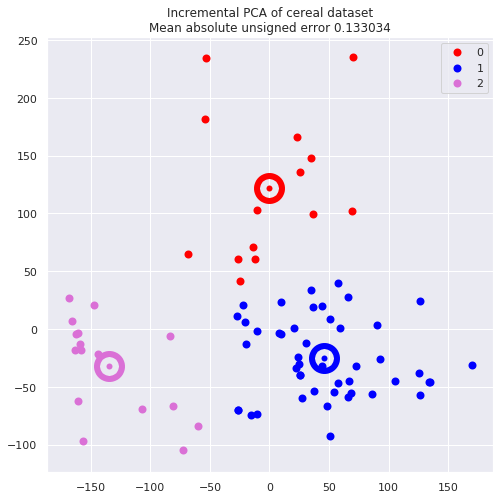

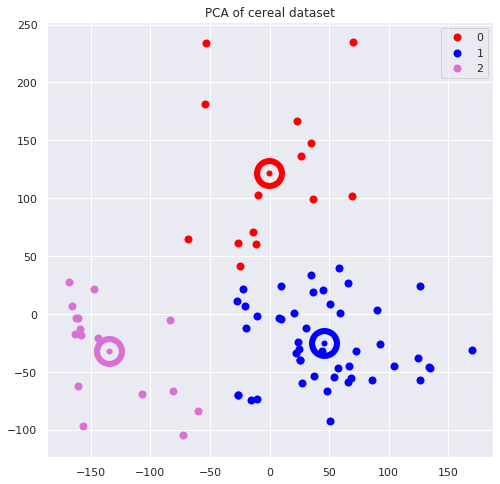

explained variance ratio (first two components): [0.54380491 0.3849574 ]


In [112]:
n_components = 2
ipca = IncrementalPCA(n_components=n_components, batch_size=4)
X_ipca = ipca.fit_transform(X)
Centr_ipca = ipca.transform(centroids)

pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)
Centr_pca = pca.transform(centroids)


colors = mcolors.CSS4_COLORS.keys()
colors = ["red", "blue", "orchid"]

for  X_transformed, centroid, title in [(X_ipca, Centr_ipca, "Incremental PCA"), (X_pca, Centr_pca, "PCA")]:
    plt.figure(figsize=(8, 8))
    for color, i, target_name in zip(colors, range(38), train_labels):
        plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
                    color=color, lw=2, label=target_name)
        
        plt.scatter(centroid[i, 0], centroid[i, 1],
                    color=color, lw=25)

    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of cereal dataset\nMean absolute unsigned error "
                  "%.6f" % err)
    else:
        plt.title(title + " of cereal dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
#    plt.axis([-4, 4, -1.5, 1.5])

plt.show()

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

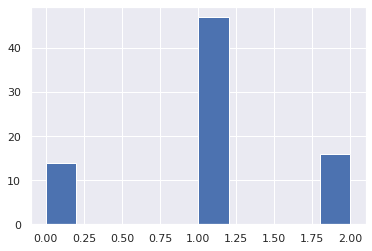

In [113]:
plt.hist(y)
plt.show()

# Raport

Napisaliśmy algorytm, który jest w stanie rozwiązać k-means wedle polecenia. Algorytm początkowo wybiera centroidy.
Zaimplementowaliśmy metodę losową, jak i metodę, która wybiera najdalej oddalone od siebie próbki z danych 
wejściowych.
Następnie w pętli for przez maxIteration lub w przypadku, gdy zmiana centroidów jest mniejsza niż epsilon dokonujemy obliczenia odległości L2 kolejnych danych do poszczególnych cebtroidów. Następnie próbkę przyporządkowujemy do najbliższego jej centroida. W kolejnym kroku na nowo obliczamy centroidy sprawdzając 
warunek wcześniejszego zakończenia, tzn. czy centroidy od ostatniej iteracji przesunęły się co najmniej o epsilon.
Jeśli zmiana nie miała miejsca kończymy algorytm zwracając aktualne przyporządkowanie danych do klastrów, oraz środki centroidów. 

Przeprowadziliśmy analizę PCA dla danych znormalizowanych oraz nieznormalizowanych. Wykorzystaliśmy StandardScaler, MinMaxScaler oraz MaxAbsScaler. PCA dla danych znormalizowanych za pomocą MinMaxScaler oraz MaxAbsScaler prezentrują sie dużo lepiej niż dla StandardScaler. 
Dzieje się tak, ponieważ dla MinMaxScaler, MaxAbsScaler, jak i dla danych nieznormalizowanych pca dla dwóch komponentów pokrywa aż 92.8% informacji wszystkich danych. Z kolei dla danych znormalizowanych za pomocą StandardScaler udało się uzyskać pokrycie jedynie 49%, co oznacza, że nie jesteśmy w stanie rzetelnie przedstawić tych danych na 2 wymiarach za pomocą tej metody.

Zarówna dla danych znormalizowanych za pomocą MinMaxScaler, MaxAbsScaler jak i dla danych niepoddanych normalizacji histogramy oraz wykresy PCA wygladają bardzo podobnie. Klasa 0 oraz 2 zostają przyporządkowane do około 15 płatków, podczas gdy klasa 1 pokrywa 45 produktów.  

Podział klas:
Cechą charakterystyczną klastra '2' jest niski poziom sodu. Żadna z próbek w tym przedziale nie osiąga więcej niż 90. Dla klasy '1' oraz '2' poziom ten osiąga średnio 200 jednostek. 
Cechą odróżniającą klaster '0' jest wysoka zawartość potasu.